# Diccionarios

In [1]:
zip_code_grancanaria = [35011, 35017, 35018, 35100, 35220, 35240, 35290, 35470]

path_bank = r'../data/datos/CM01_3/'


## Mezcla de los datos

In [1]:
import os 
import glob


import pandas as pd
import numpy as np

In [3]:
filenames = glob.glob(path_bank+"/*.csv")

split = filenames[0].find("CM01_3/")+7
cards = []
avg_mount = []

for i in filenames:
    if i[split:split+5]=="cards":
        cards.append(i)
    elif i[split:split+5]=="avg_a":
        avg_mount.append(i)
    else:
        next

In [36]:
cards_total = pd.DataFrame(columns=['zipcode', 'country', 'day', 'cards'])
for i in cards:
    aux_df = pd.read_csv(i)
    cards_total = pd.concat([cards_total, aux_df])
    
cards_total.to_csv(path_bank+"cards_total.csv", index=False)

In [4]:
avg_mount_total = pd.DataFrame(columns=['zipcode', 'country', 'day', 'avg_amount'])
for i in avg_mount:
    aux_df = pd.read_csv(i)
    avg_mount_total = pd.concat([avg_mount_total, aux_df])
    
avg_mount_total.to_csv(path_bank+"avg_mount_total.csv", index=False)

# EDA

In [2]:
import os 
import glob


import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

## Cards

In [47]:
cards = pd.read_csv(path_bank+"cards_total.csv")
cards.head()

cards_zip_grancanaria= cards[cards["zipcode"].isin(zip_code_grancanaria)]
cards_zip_grancanaria["country_new"] = cards_zip_grancanaria["country"].apply(lambda x: "ES" if x=="ES" else "EX")

<ipython-input-47-42dc6cdee35d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cards_zip_grancanaria["country_new"] = cards_zip_grancanaria["country"].apply(lambda x: "ES" if x=="ES" else "EX")


#### Complete

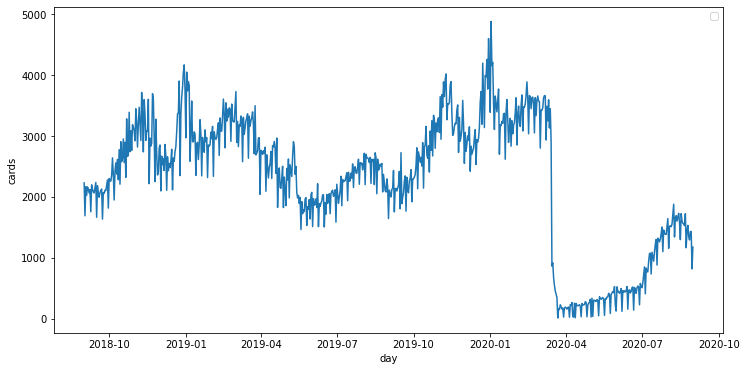

In [43]:
cards_grancanaria= cards_zip_grancanaria.groupby(["day"]).cards.sum().reset_index()
cards_grancanaria["day"] = pd.to_datetime(cards_grancanaria["day"]).copy()

fig = plt.figure(figsize=(12,6))
sns.lineplot(data=cards_grancanaria, y="cards", x="day")
plt.legend([])
plt.show()

#### By country

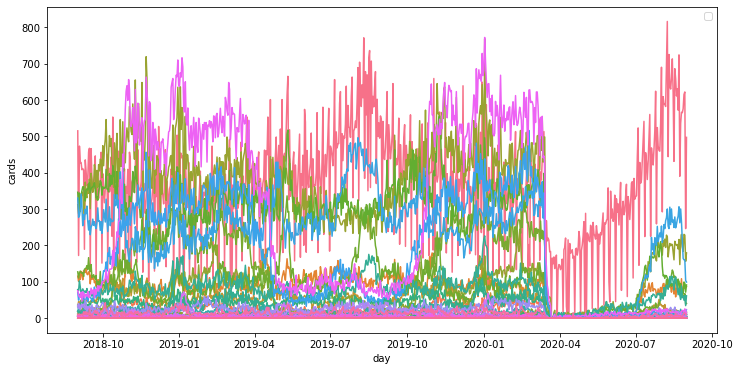

In [45]:
cards_grancanaria= cards_zip_grancanaria.groupby(["country", "day"]).cards.sum().reset_index()
cards_grancanaria["day"] = pd.to_datetime(cards_grancanaria["day"]).copy()

fig = plt.figure(figsize=(12,6))
sns.lineplot(data=cards_grancanaria, y="cards", x="day", hue="country")
plt.legend([])
plt.show()

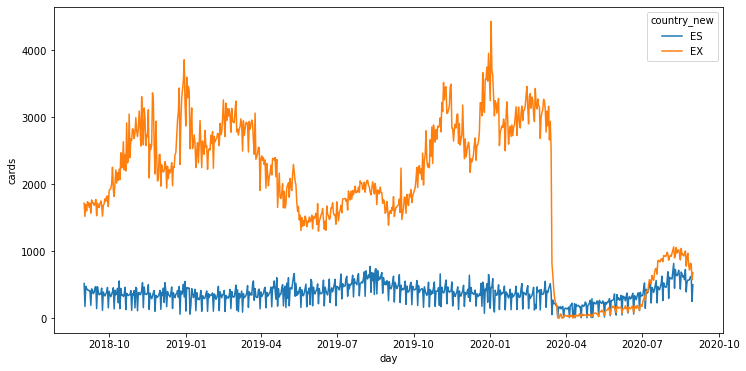

In [64]:
cards_grancanaria= cards_zip_grancanaria.groupby(["country_new", "day"]).cards.sum().reset_index()
cards_grancanaria["day"] = pd.to_datetime(cards_grancanaria["day"]).copy()

fig = plt.figure(figsize=(12,6))
sns.lineplot(data=cards_grancanaria, y="cards", x="day", hue="country_new")
plt.show()

## Avg mounth 

In [51]:
avg_mounth = pd.read_csv(path_bank+"avg_mount_total.csv")
avg_mounth.head()

avg_mounth_zip_grancanaria= avg_mounth[avg_mounth["zipcode"].isin(zip_code_grancanaria)]
avg_mounth_zip_grancanaria["country_new"] = avg_mounth_zip_grancanaria["country"].apply(lambda x: "ES" if x=="ES" else "EX")

<ipython-input-51-c9a0415c7688>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_mounth_zip_grancanaria["country_new"] = avg_mounth_zip_grancanaria["country"].apply(lambda x: "ES" if x=="ES" else "EX")


### Canaria

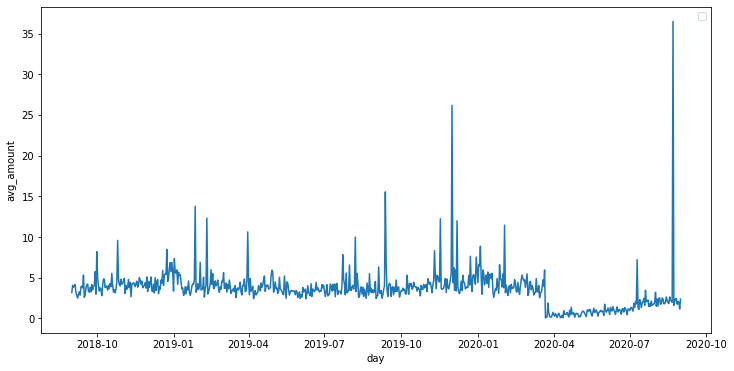

In [52]:
avg_mounth_grancanaria= avg_mounth_zip_grancanaria.groupby(["day"]).avg_amount.mean().reset_index()
avg_mounth_grancanaria["day"] = pd.to_datetime(avg_mounth_grancanaria["day"]).copy()

fig = plt.figure(figsize=(12,6))
sns.lineplot(data=avg_mounth_grancanaria, y="avg_amount", x="day")
plt.legend([])
plt.show()

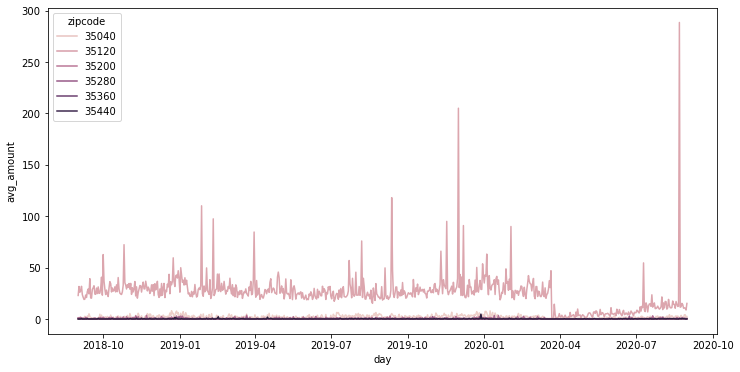

In [8]:
avg_mounth_zip_grancanaria= avg_mounth[avg_mounth["zipcode"].isin(zip_code_grancanaria)]
avg_mounth_grancanaria= avg_mounth_zip_grancanaria.groupby(["zipcode","day"]).avg_amount.mean().reset_index()
avg_mounth_grancanaria["day"] = pd.to_datetime(avg_mounth_grancanaria["day"]).copy()

fig = plt.figure(figsize=(12,6))
sns.lineplot(data=avg_mounth_grancanaria, y="avg_amount", x="day", hue="zipcode")
#plt.legend([])
plt.show()

In [13]:
avg_mounth_zip_grancanaria.country.unique()

array(['ad', 'ar', 'au', 'at', 'by', 'be', 'ba', 'br', 'bg', 'ca', 'cv',
       'cl', 'cn', 'co', 'cr', 'hr', 'cy', 'cz', 'dk', 'de', 'ec', 'sv',
       'ee', 'fi', 'fr', 'gh', 'gr', 'gt', 'hk', 'hu', 'is', 'in', 'ie',
       'il', 'it', 'jp', 'kr', 'kg', 'lv', 'lb', 'lt', 'lu', 'my', 'ml',
       'mt', 'mr', 'mx', 'ma', 'na', 'nl', 'nz', 'ng', 'no', 'pa', 'pe',
       'ph', 'pl', 'pt', 'pr', 'qa', 'tr', 'ro', 'ru', 'sa', 'sn', 'rs',
       'sg', 'sk', 'si', 'za', 'se', 'ch', 'tw', 'tt', 'ua', 'ae', 'gb',
       'us', 'uy', 'others', 'ES'], dtype=object)

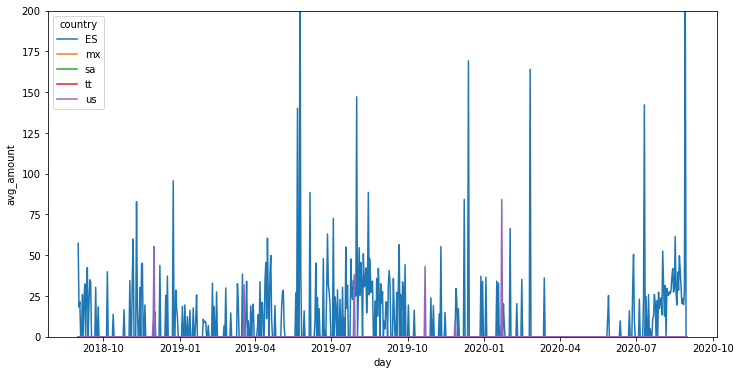

In [16]:
best_code = 35120
avg_mounth_zip_grancanaria= avg_mounth[avg_mounth["zipcode"]==best_code]
#avg_mounth_grancanaria= avg_mounth_zip_grancanaria.groupby(["country","day"]).avg_amount.mean().reset_index()
avg_mounth_grancanaria["day"] = pd.to_datetime(avg_mounth_grancanaria["day"]).copy()
avg_mounth_grancanaria = avg_mounth_grancanaria[avg_mounth_grancanaria.country.isin(["ES", "sa", "us", "mx", "tt"])]
fig = plt.figure(figsize=(12,6))
sns.lineplot(data=avg_mounth_grancanaria, y="avg_amount", x="day", hue="country")
#plt.legend([])
plt.ylim(0,200)
plt.show()


## Conclusión

Para analizar el gasto tendrías que analizar conjunto al número de tarjetas

In [54]:
cards_avg = pd.merge(cards_zip_grancanaria, avg_mounth_zip_grancanaria, on=["zipcode","country", "country_new", "day"], how="inner")

In [55]:
cards_avg["gasto"] = cards_avg[["cards", "avg_amount"]].apply(lambda x: x[0]*x[1], axis=1)
cards_avg

,zipcode,country,day,cards,country_new,avg_amount,gasto
0,35220,ad,2018-09-01,0.0,EX,0.00,0.00
1,35220,ad,2018-09-02,0.0,EX,0.00,0.00
2,35220,ad,2018-09-03,0.0,EX,0.00,0.00
3,35220,ad,2018-09-04,0.0,EX,0.00,0.00
4,35220,ad,2018-09-05,0.0,EX,0.00,0.00
...,...,...,...,...,...,...,...
473683,35290,ES,2020-08-27,4.0,ES,31.35,125.40
473684,35290,ES,2020-08-28,8.0,ES,21.36,170.88
473685,35290,ES,2020-08-29,3.0,ES,35.94,107.82
473686,35290,ES,2020-08-30,0.0,ES,0.00,0.00


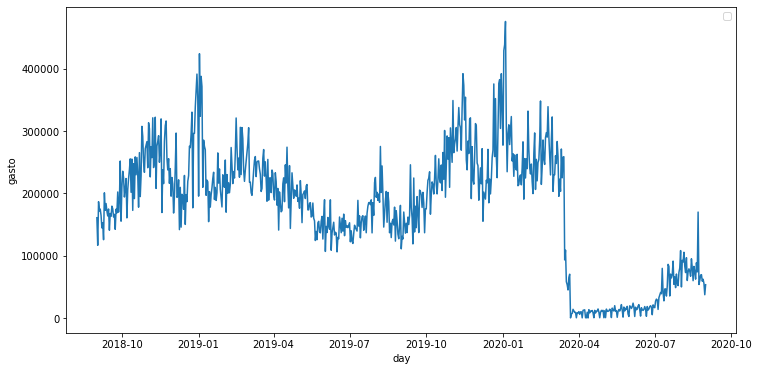

In [56]:
cards_grancanaria= cards_avg.groupby(["day"]).gasto.sum().reset_index()
cards_grancanaria["day"] = pd.to_datetime(cards_grancanaria["day"]).copy()

fig = plt.figure(figsize=(12,6))
sns.lineplot(data=cards_grancanaria, y="gasto", x="day")
plt.legend([])
plt.show()

  country_new        day     gasto
0          ES 2018-09-01  19851.57
1          ES 2018-09-02   7532.35
2          ES 2018-09-03  28441.63
3          ES 2018-09-04  24010.92
4          ES 2018-09-05  17117.21


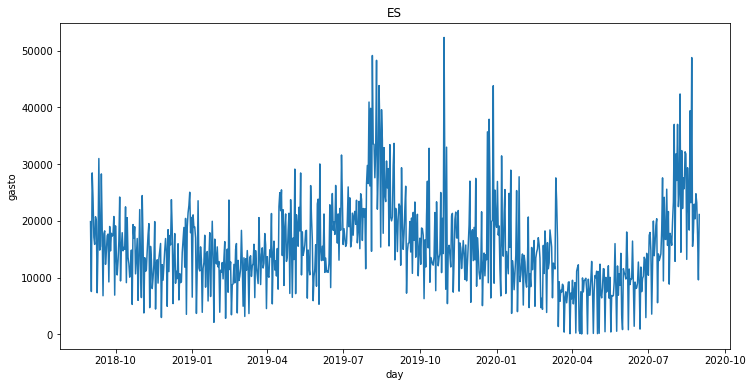

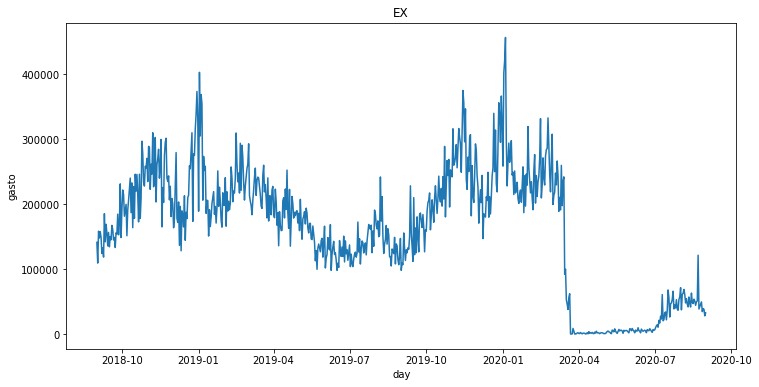

In [77]:
cards_grancanaria= cards_avg.groupby(["country_new", "day"]).gasto.sum().reset_index()
cards_grancanaria["day"] = pd.to_datetime(cards_grancanaria["day"]).copy()
print(cards_grancanaria.head())
for i in ["ES", "EX"]:
    fig = plt.figure(figsize=(12,6))
    sns.lineplot(data=cards_grancanaria[cards_grancanaria.country_new==i], y="gasto", x="day")
    plt.title(i)
    plt.show()

In [78]:
cards_grancanaria.head(2)

,country_new,day,gasto
0,ES,2018-09-01,19851.57
1,ES,2018-09-02,7532.35


In [81]:
gasto_turistas = pd.pivot_table(cards_grancanaria, values="gasto", index=["day"], columns=["country_new"],
              aggfunc=np.sum).reset_index()

In [84]:
gasto_turistas.columns

Index(['day', 'ES', 'EX'], dtype='object', name='country_new')

In [85]:
gasto_turistas.to_csv(path_bank+"gatos_turistas.csv", index=False)